<a href="https://colab.research.google.com/github/FrancescoSarandrea/deeplearning/blob/main/MNIST_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import  mnist 
from tensorflow.keras.utils import to_categorical 

In [ ]:
# In questo esercizio analizzeremo dei dati che corrispondono a cifre scritte a 
# mano, rappresentate da immagini di risoluzione 28 X 28 
# Le immagini verranno deformate e convertite in vettori uni-dimensionali, perche'
# in questo caso non sara' necessario mantenere le informazioni sulla prossimita'
# non utilizziamo reti specifiche per l'analisi di immagini, 
# ma quelle piu' tradizionali 

(Xt,Yt),(Xv,Yv)=mnist.load_data(path='mnist.npz')
Xt.shape

(60000, 28, 28)

In [ ]:
# trasformiamo le variabili target  in train e validation in dummy
Y_t=to_categorical(Yt,num_classes=10)
Y_v=to_categorical(Yv,num_classes=10) 

In [ ]:
Y_t

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
_t

NameError: ignored

In [ ]:
# oltre a trasformare in vettori, conviene normalizzare i valori dei pixel,
# che sono nell'intervallo [0-255]
X_t=Xt.reshape(60000,784)/255.
X_v=Xv.reshape(10000,784)/255.

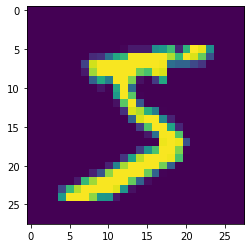

In [ ]:
import matplotlib.pyplot as plt

#plt.gray()
plt.imshow(Xt[0,:,:])

In [ ]:
# ora costruiamo il il NN
from tensorflow.keras.layers import Input,Dense, Dropout
from tensorflow.keras.models import Model

inp=Input(shape=(784))
x=Dense(512, activation='relu')(inp)
x=Dense(128, activation='relu')(x)
x=Dense(128, activation='relu')(x)
x=Dropout(0.5)(x)
out=Dense(10,activation='softmax')(x)

#definiamo il modello

modello=Model(inp,out)
# con summary stampiamo le caratteristiche del modello
modello.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 485,386
Trainable params: 485,386
Non-trainable

In [ ]:
Y_t

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
print(type(Y_t))
print(type(X_t))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
X_t

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# bisogna compilare il modello. specificando la loss function e la metrica
# visto che questo e' un caso politonico, usiamo la loss function
# categorical crossentropy
modello.compile(loss='categorical_crossentropy',metrics=['accuracy'])
modello.fit(X_t,Y_t,epochs=20,validation_data=(X_v,Y_v),batch_size=64)

Epoch 1/20
938/938 [==============================] - 11s 11ms/step - loss: 2.4152 - accuracy: 0.5130 - val_loss: 1.2362 - val_accuracy: 0.6120
Epoch 2/20
938/938 [==============================] - 10s 11ms/step - loss: 1.1432 - accuracy: 0.6570 - val_loss: 0.8750 - val_accuracy: 0.7621
Epoch 3/20
938/938 [==============================] - 9s 10ms/step - loss: 0.7873 - accuracy: 0.7844 - val_loss: 0.6446 - val_accuracy: 0.8391
Epoch 4/20
938/938 [==============================] - 10s 10ms/step - loss: 0.5337 - accuracy: 0.8886 - val_loss: 0.4579 - val_accuracy: 0.9173
Epoch 5/20
938/938 [==============================] - 9s 10ms/step - loss: 0.4271 - accuracy: 0.9109 - val_loss: 0.4579 - val_accuracy: 0.9096
Epoch 6/20
938/938 [==============================] - 9s 10ms/step - loss: 0.4129 - accuracy: 0.9223 - val_loss: 0.4501 - val_accuracy: 0.9332
Epoch 7/20
938/938 [==============================] - 9s 10ms/step - loss: 0.3876 - accuracy: 0.9266 - val_loss: 0.5967 - val_accuracy: 0.9

In [ ]:
modello.evaluate(X_v,Y_v)

313/313 [==============================] - 1s 3ms/step - loss: 1.2731 - accuracy: 0.9533


[1.273105502128601, 0.9532999992370605]

In [ ]:
yy=modello.predict(X_v)

In [ ]:
# la confusion matrix ci permette di stimare l'accuratezza della previsione sul 
# validation set
from sklearn.metrics import confusion_matrix
import numpy as np

ystim=np.argmax(yy,axis=1)
confusion_matrix(ystim,Yv) 

array([[ 960,    0,    0,    0,    0,    2,    3,    0,    0,    1],
       [   1, 1053,    0,    0,    1,    0,    1,    0,    0,    1],
       [   1,    4, 1016,    9,    1,    2,    9,   14,   11,    0],
       [   0,    0,    0,  923,    0,    4,    0,    0,    1,    1],
       [   0,    0,    0,    0,  929,    0,    1,    0,    2,    5],
       [   0,    1,    0,    5,    0,  819,    1,    0,    1,    2],
       [   2,    4,    1,    0,    6,   13,  939,    0,    5,    0],
       [   2,    2,   10,   12,    4,    3,    1,  996,    8,   11],
       [  11,   70,    5,   58,   16,   44,    3,    7,  929,   19],
       [   3,    1,    0,    3,   25,    5,    0,   11,   17,  969]])

ValueError: ignored

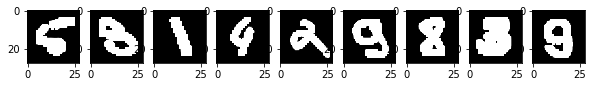

In [ ]:
# visualizziamo alcune delle immagini che il NN non e' riuscito ad identificare 
plt.figure(figsize=(10,1))
j=0
for i in range(9):
  while Yv[j]==ystim[j]:
    j+=1
  ax=plt.subplot(1,9,i+1)
  plt.imshow(Xv[j,:,:],vmin=0,vmax=1)
  plt.gray()
  j+=1


In [ ]:
print(Yv[12])
ystim[12]

9


9

# AUTOENCODER
Un autoencorder e' una rete neurale che ha input e output uguale o simile. Nello specifico lavoreremo su datiche vogliamo pulire dal rumore.

In [ ]:
# aggiungiamo artificialmente del rumore ai dati di training e di validation
X_t_noisy=X_t+0.4*np.random.normal(size=X_t.shape)
X_v_noisy=X_v+0.4*np.random.normal(size=X_v.shape)

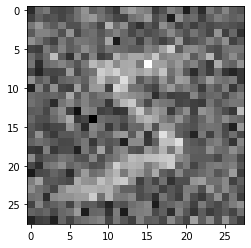

In [ ]:
plt.imshow(X_t_noisy[0,:].reshape((28,28)))

In [ ]:
# creiamo un modello per la pulizia
# l'activation function dell'output e' sigmoid perche' per la pulizia vogliamo 
# un confronto pixel per pixel

inp=Input(shape=(784))
x=Dense(512, activation='relu')(inp)
x=Dense(64, activation='relu')(x)
x=Dense(32, activation='relu')(x)
x=Dense(64, activation='relu')(x)
x=Dense(512, activation='relu')(x)
x=Dropout(0.5)(x)
out=Dense(784,activation='sigmoid')(x)

modello=Model(inp,out)
modello.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_41 (Dense)            (None, 512)               401920    
                                                                 
 dense_42 (Dense)            (None, 64)                32832     
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 64)                2112      
                                                                 
 dense_45 (Dense)            (None, 512)               33280     
                                                                 
 dropout_8 (Dropout)         (None, 512)               0   

In [ ]:
autoencoder=Model(inp,out)
autoencoder.compile(loss='binary_crossentropy')

In [ ]:
#eseguiamo il fit
autoencoder.fit(X_t_noisy,X_t,epochs=50,shuffle=True)

Epoch 1/50
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1689
Epoch 2/50
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1426
Epoch 3/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1374
Epoch 4/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1347
Epoch 5/50
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1327
Epoch 6/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1313
Epoch 7/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1302
Epoch 8/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1294
Epoch 9/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1285
Epoch 10/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1279
Epoch 11/50
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1274
Epoch 12/50
1875/1875 [==============================] - 27s 14

KeyboardInterrupt: ignored

In [ ]:
immagini=autoencoder.predict(X_v_noisy)

In [ ]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax.plt.subplot(2,n,i+1)
  plt.imshow(X_t_noisy[i].reshape(28,28))
  plt.gray()

AttributeError: ignored

<Figure size 1440x288 with 0 Axes>

# Convolutional Neural Networks

In [ ]:
# queta volta non vogliamo cambaire la forma delle immagini 
#(le manteniamo quadrate), ma dobbiamo specificare un'ulteriore dimensione che
# rappresenta il numero del canale (in questo caso solo uno). In questo modo 
# possiamo trattare immagini in bianco e nero
X_t=Xt.reshape(60000,28,28,1)/255.
X_v=Xv.reshape(-1,28,28,1)/255.

In [ ]:
# trasformiamo le variabili target  in train e validation in dummy
Y_t=to_categorical(Yt,num_classes=10)
Y_v=to_categorical(Yv,num_classes=10) 

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.models import Model

inp=Input(shape=(28,28,1))

# specifichiamo il numero di filtri e le loro dimensioni
x=Conv2D(32,(3,3),activation='relu')(inp)
# il maxpooling di default e' 2 X 2
x=MaxPooling2D()(x)
x=Conv2D(32,(3,3),activation='relu')(x)
x=MaxPooling2D()(x)
x=Flatten()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.5)(x)
out=Dense(10,activation='softmax')(x)
modello=Model(inp,out)
modello.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0   

In [ ]:
modello.compile(loss='categorical_crossentropy',metrics=['accuracy'])
modello.fit(X_t,Y_t,epochs=20,validation_data=(X_v,Y_v),batch_size=64)

Epoch 1/20
938/938 [==============================] - 16s 5ms/step - loss: 0.2493 - accuracy: 0.9242 - val_loss: 0.0613 - val_accuracy: 0.9801
Epoch 2/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0844 - accuracy: 0.9751 - val_loss: 0.0401 - val_accuracy: 0.9858
Epoch 3/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0647 - accuracy: 0.9810 - val_loss: 0.0309 - val_accuracy: 0.9903
Epoch 4/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0527 - accuracy: 0.9848 - val_loss: 0.0377 - val_accuracy: 0.9879
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0498 - accuracy: 0.9859 - val_loss: 0.0326 - val_accuracy: 0.9901
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0477 - accuracy: 0.9862 - val_loss: 0.0314 - val_accuracy: 0.9906
Epoch 7/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0481 - accuracy: 0.9862 - val_loss: 0.0437 - val_accuracy: 0.9863
Epoch

In [ ]:
modello.evaluate(X_v,Y_v)

313/313 [==============================] - 1s 3ms/step - loss: 0.0424 - accuracy: 0.9875


[0.042438749223947525, 0.987500011920929]

In [ ]:
modello.predict()

In [ ]:
# la performance puo' essere migliorata aggiungendo il padding 
# (visto che le immagini sono piccole) e 
x=Conv2D(64,(3,3),activation='relu',padding='same')(inp)
# il maxpooling di default e' 2 X 2
x=MaxPooling2D()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=MaxPooling2D()(x)
x=Flatten()(x)
x=Dense(128,activation='relu',padding='same')(x)
x=Dropout(0.5)(x)
out=Dense(10,activation='softmax')(x)
modello=Model(inp,out)
modello.summary()

TypeError: ignored